In [1]:
import cv2
import numpy as np
import time as t
import os
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML, Image

%matplotlib inline

print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.1 


<hr>
<h5>1. Abra o ficheiro com a imagem "lenac.tif" e apresente a imagem. Verifique para que servem os métodos "dtype" e "shape":</h5>
<hr>

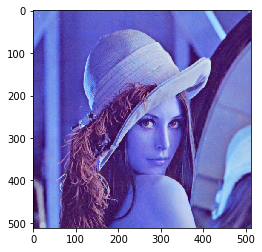

In [2]:
originalfile = "lenac.tif"
#file = "lena.tiff"

def show(file):
    
    image = cv2.imread(file)
    size = os.path.getsize(file)
    return image, size


originalimage, originalsize = show(originalfile)
plt.figure()
plt.imshow(originalimage)
plt.show()

![Lena](lenac80.jpg)


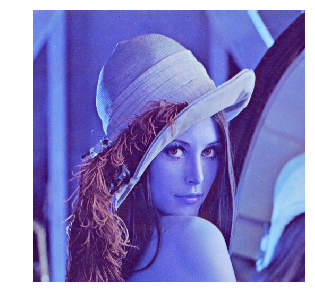

Image Array Type: uint8
Image Dimensions: 512x512
Channels: RGB3
Original File Size: 786.814 KB


In [3]:
#Chrome não suporta tif/tiff. display(Image(originalfile) não funciona)
plt.figure(figsize=(5,5))
plt.imshow(originalimage)
plt.axis('off')
plt.show()

print('Image Array Type: ' + str(originalimage.dtype))
print('Image Dimensions: ' + str(originalimage.shape[0]) + 'x' + str(originalimage.shape[1]))
print('Channels: RGB' + str(originalimage.shape[2]))
print('Original File Size: ' + str(originalsize/1000.) + ' KB')

#display(HTML('<div><p>'\
#             'Image Array Type: ' + str(originalimage.dtype) + '<br>'\
#             'Image Dimensions: ' + str(originalimage.shape[0]) + 'x' + str(originalimage.shape[1]) + '<br>'\
#             'Channels: RGB' + str(originalimage.shape[2]) + '<br>'\
#             'Original File Size: ' + str(originalsize/1000.) + ' KB</p><div>'))

<hr>
<h5>2. Grave a mesma imagem, mas agora em formato "JPEG" com diferentes qualidades. Verifique visualmente a qualidade das imagens assim como o tamanho do ficheiro. Calcule a taxa de compressão, a SNR e a PSNR.</h5>
<hr>

In [4]:
def compress(file, image, compression):
    
    cv2.imwrite(file, image, compression)
    compressedimage = cv2.imread(file)
    compressedsize = os.path.getsize(file)
    return compressedimage, compressedsize


def calculateCR(originalfile, compressedfile):
    
    return os.path.getsize(originalfile)/os.path.getsize(compressedfile)


def calculateSNR(originalimage, compressedimage):
    
    signal = np.sum(np.power(compressedimage, 2))
    noise = np.sum(np.power((originalimage-compressedimage), 2))
    return 10*np.log10(signal/noise)


def calculatePSNR(originalimage, compressedimage):
    
    maxvalue = np.power(np.max(originalimage), 2)
    meansquarederror = (1/(3*compressedimage.shape[0]*compressedimage.shape[1])) * \
                        np.sum(np.power((originalimage-compressedimage), 2))
    return 10*np.log10(maxvalue/meansquarederror)


newfiles = ["lenac100.jpg", "lenac80.jpg", "lenac10.jpg"]
modes = [100, 80, 10]
n = len(modes)

newimages = [None]*n
newsizes = [0]*n
CRvalues = [0]*n
SNRvalues = [0]*n
PSNRvalues = [0]*n

for i in range(n):
    newimages[i], newsizes[i] = compress(newfiles[i], originalimage, (cv2.IMWRITE_JPEG_QUALITY, modes[i]))
    CRvalues[i] = calculateCR(originalfile, newfiles[i])
    SNRvalues[i] = calculateSNR(originalimage, newimages[i])
    PSNRvalues[i] = calculatePSNR(originalimage, newimages[i])

In [5]:
for i in range(len(newimages)):
    display(Image(url= newfiles[i], width=256, height=256))
    display(HTML('<p>'\
                'Image Array Type: '+str(newimages[i].dtype)+'<br>'\
                'Image Dimensions: '+str(newimages[i].shape[0])+'x'+str(newimages[i].shape[1])+'<br>'\
                'Channels: RGB'+str(newimages[i].shape[2])+'<br>'\
                'Compression Rate: '+str(round(CRvalues[i], 2))+'<br>'\
                'SNR: '+str(round(SNRvalues[i], 2))+' dB<br>'\
                'PSNR: '+str(round(PSNRvalues[i], 2))+' dB<br>'\
                'Compressed File Size: '+str(newsizes[i]/1000.)+' KB</p></p><hr>'))

<hr>
<h5>3. Converta a imagem para níveis de cinzento, usando o método "cvtColor" e grave a imagem. Este método aplica
<br>a transformação Y = R∗299/1000 + G∗587/1000 + B∗114/1000, justifique a utilização desta equação. Verifique também o <br>tamanho do ficheiro e compare-o com o ficheiro original.</h5>
<hr>

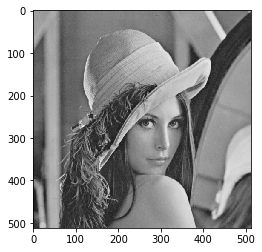

In [6]:
#Converting Image File To Gray Scale

def convert(image, file):
    
    cv2.imwrite(file, cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    convertedsize = os.path.getsize(file)
    convertedimage = cv2.imread(file)
    return convertedimage, convertedsize

convertedfile = "lenacCOLOR_BGR2GRAY.jpg"
convertedimage, convertedsize = convert(originalimage, convertedfile)
plt.figure()
plt.imshow(convertedimage)
plt.show()

In [7]:
display(Image(url=convertedfile, width=256, height=256))
display(HTML('<p>'\
            'Image Array Type: '+str(convertedimage.dtype)+'<br>'\
            'Image Dimensions: '+str(convertedimage.shape[0])+'x'+str(newimages[0].shape[1])+'<br>'\
            'Channels: RGB'+str(convertedimage.shape[2])+'<br>'\
            'Converted File Size: '+str(convertedsize/1000.)+' KB</p></p><hr>'))
    

<hr>
<h5>4. Apresente o histograma da imagem em tons de cinzento, verifique quantos níveis de cinzento tem a imagem.</h5>
<hr>

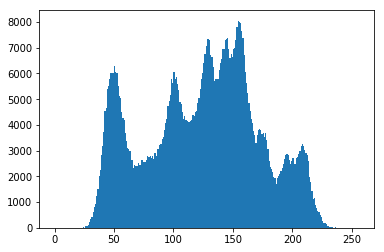

In [8]:
display(Image(url=convertedfile, width=256, height=256))
display(HTML('<p>'\
            'Image Array Type: '+str(convertedimage.dtype)+'<br>'\
            'Image Dimensions: '+str(convertedimage.shape[0])+'x'+str(newimages[0].shape[1])+'<br>'\
            'Channels: RGB' +str(convertedimage.shape[2])+ '<br>'\
            'Converted File Size: '+str(convertedsize/1000.)+' KB</p></p><hr>'))

plt.hist(convertedimage.ravel(), 256, [0,256])
plt.show()



<hr>
<h5>5. Nos próximos trabalhos será necessário realizar operações com os valores de cada pixel. Para este efeito pode-se
transformar a imagem para um array. O código seguinte representa o pixel mais significante da imagem.
Apresente oito imagens, cada uma com o valor de cada bit para todos os pixeis.</h5>
<hr>

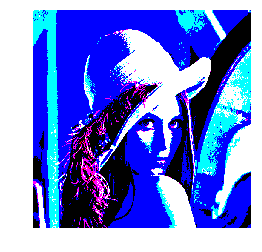

In [9]:
def binaryarray(image):
    
    file = "lenabinary.jpg"
    cv2.imwrite(file, image)
    sampleimage = cv2.imread(file)
    
    y = sampleimage > 127
    z = y * 1.0 
    plt.imshow(z, cmap='gray')
    plt.axis("off")
    plt.show()
    #t, transformedimage = cv2.threshold(completeimage, 127, 255, cv2.THRESH_BINARY)
    
    return z
    
binaryimage = binaryarray(originalimage)


Image Type: uint8
Image Array Shape: (512, 512, 3)
Most Significant Bit: 8
Highest Value: 255


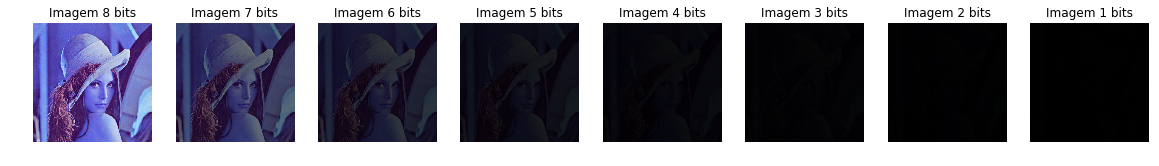

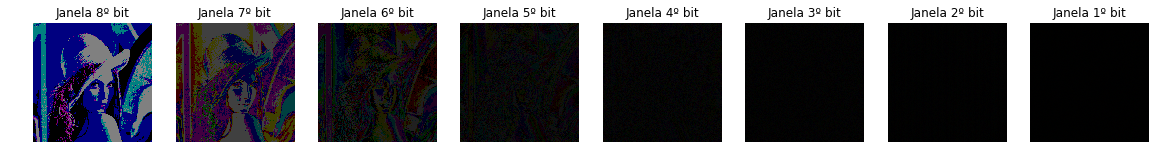

In [10]:
def bitfilter(image):
    
    mostsignificantbit = int(str(image.dtype)[-1:]) 
    highestvalue = np.amax(image)
    tempfile = "lenashift.jpg"
    bitmask = 0b10000000
    
    print("Image Type: " + str(image.dtype))
    print("Image Array Shape: " + str(image.shape))
    print("Most Significant Bit: " + str(mostsignificantbit))
    print("Highest Value: " + str(highestvalue))
    
    
    plt.figure(figsize=(20,20))
    
    for i in range(mostsignificantbit):
        bitshiftedimage = np.right_shift(image, i)
        plt.subplot(2, mostsignificantbit, i + 1)
        plt.title("Imagem " + str(mostsignificantbit - i) + " bits")
        plt.imshow(bitshiftedimage)
        plt.axis("off")
    
    plt.show()
      
    plt.figure(figsize=(20,20))
    
    for i in range(mostsignificantbit):
        maskedbitimage = np.bitwise_and(image, bitmask)
        bitmask = bitmask>>1
        plt.subplot(2, mostsignificantbit, i + 1)
        plt.title("Janela " + str(mostsignificantbit - i) + "º bit")
        plt.imshow(maskedbitimage)
        plt.axis("off")
    
    plt.show()
    
        
bitfilter(originalimage)

<hr>
<h5>6. Grave uma imagem que contém apenas a informação dos 4 bits mais significantes da imagem.</h5>
<hr>

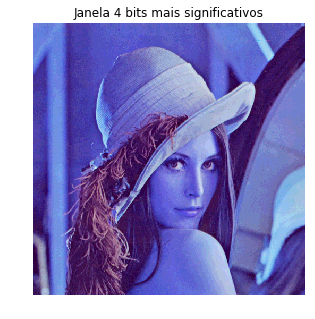

In [11]:
def bitmasking(image):

    MSBmask = 0b11110000
    file = "lenac4bit.jpg"
    
    MSBimage = np.bitwise_and(image, MSBmask)
    #cv2.imwrite(file, MSBimage)
    #cv2.imread(file)
    plt.figure(figsize=(5,5))
    plt.title("Janela 4 bits mais significativos")
    plt.imshow(MSBimage)
    plt.axis("off")
    plt.show()

workingfile = "lenac100.jpg"
workingimage = cv2.imread(workingfile)
bitmasking(workingimage)

<hr>
<h5>7. Crie uma função que apresente uma imagem (100×100) como se apresenta na ﬁgura. O ângulo de cada sector é dado por parâmetro passado à função (o ângulo é um valor inteiro entre 0 e 360 graus).</h5>
<hr>


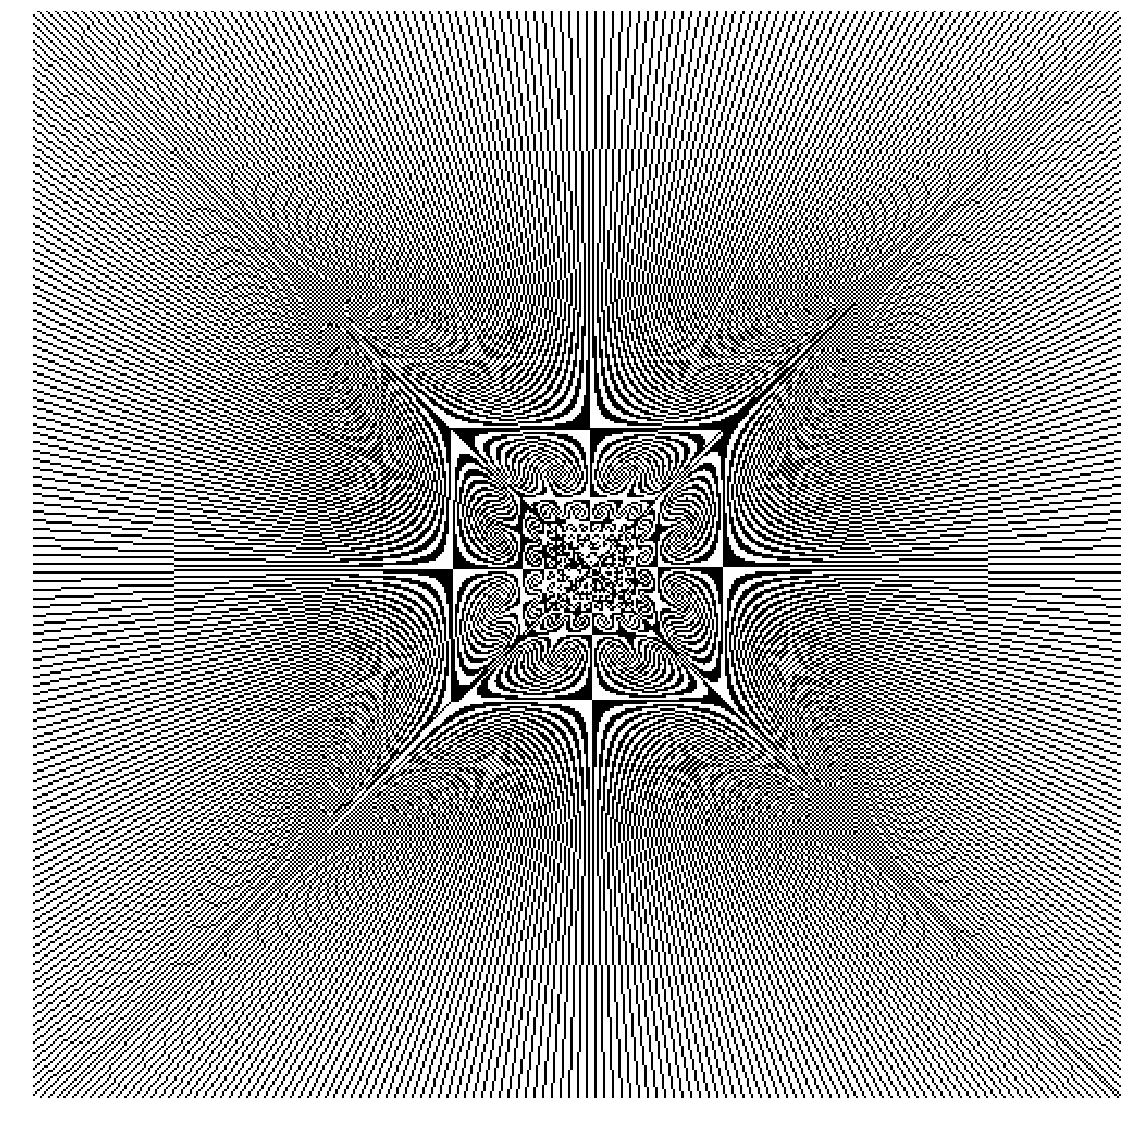

In [12]:
def draw(image):
    
    plt.figure(figsize=(30,20))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def buildopticalillusion():
    
    canvas = np.zeros((500,500,3), np.uint8)
    canvas.fill(255)

    white = [255]*3
    black = [0]*3
    colors = [white, black]
    index = 0
    pixel = 1
    limit = 500
    start = 0
    
    for x in np.arange(start,limit,2):
        image = cv2.line(canvas,(256,256),(x,start),(colors[index]),pixel)
        image = cv2.line(canvas,(256,256),(limit,x),(colors[index]),pixel)
        image = cv2.line(canvas,(256,256),(limit-x,limit),(colors[index]),pixel)
        image = cv2.line(canvas,(256,256),(start,limit-x),(colors[index]),pixel)
        index = (index+1)%2
    
    draw(image)
    
    
buildopticalillusion()

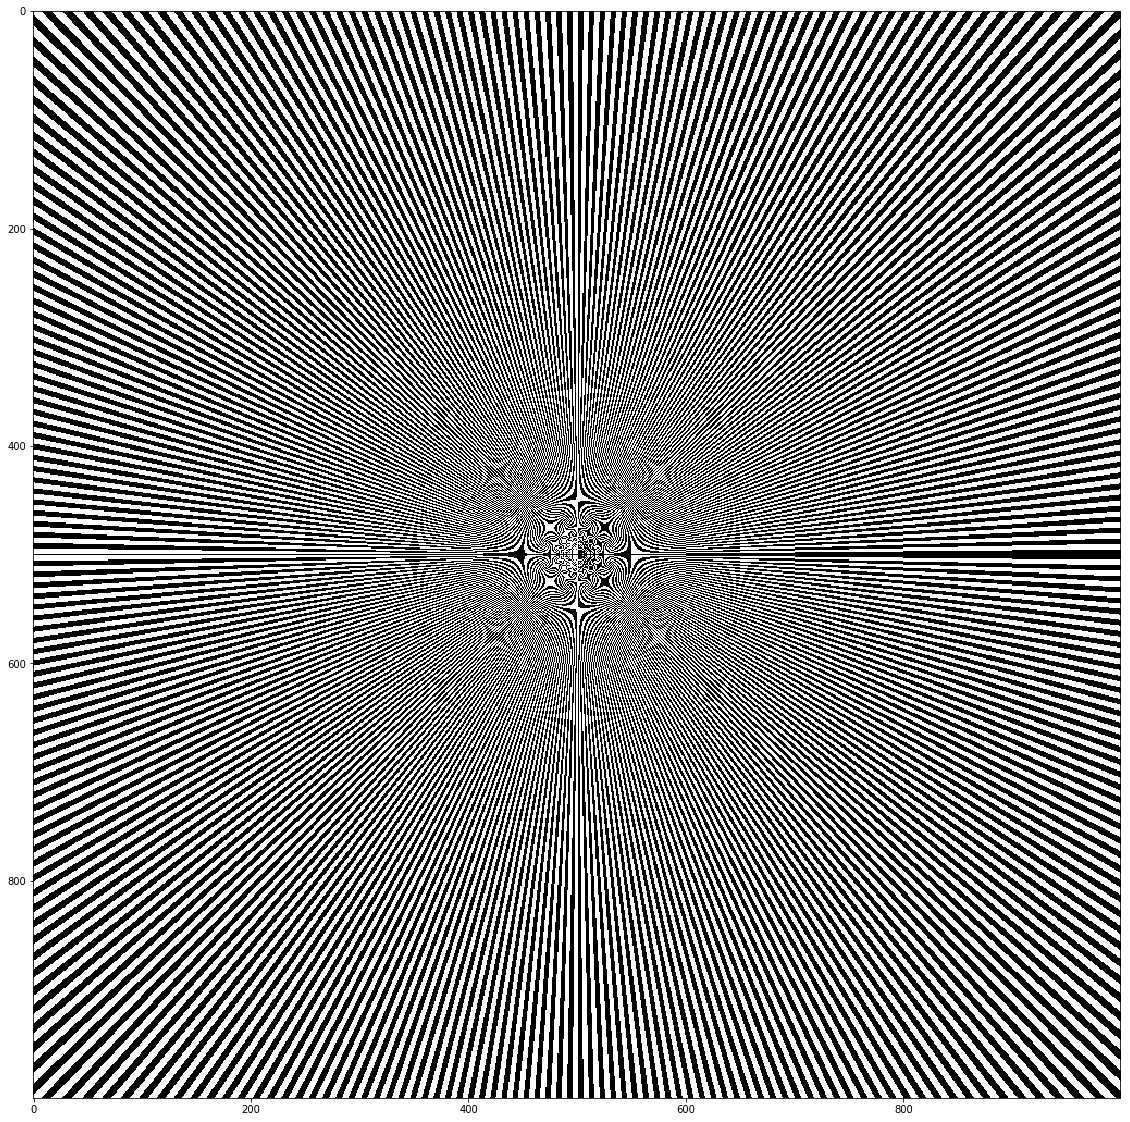

In [13]:
def illusion(scale):
    x = np.arange(-500, 500, 1)
    y = np.arange(-500, 500, 1)*1j
    x, y = np.meshgrid(x, y)
    z = x + y
    lines = np.floor((np.angle(z)*scale).astype(np.int32))%2*255
    plt.figure(figsize=(30,20))
    plt.imshow(lines, cmap='gray')
    plt.show()
illusion(100)

<hr>
<h5>8. Construa uma função que realize o algoritmo de dithering Floyd Steinberg. Esta função recebe uma matrix (com os pixeis em tons de cinzento) e devolve uma matrix com valores a preto e branco. Este algoritmo aproxima cada pixel da imagem (x) ao valor mais próximo (preto ou branco) e o erro é difundido para os pixeis adjacentes seguindo o método: </h5>
<hr>


In [18]:
%%time

def dither(image):
    
    imageFSD = image[:,:,0] #One Channel Conversion
    #imageFSD = image[:,:,[2,1,0]] #BGR Channels Conversion
    
    iwidth = imageFSD.shape[0]
    iheight = imageFSD.shape[1]
    colors = 1
    
    for x in range(0, iwidth-1):
        for y in range(0, iheight-1):

            pixel = imageFSD[x][y]

            qpixel = np.round(colors*pixel/255)*(255/colors)

            error = pixel - qpixel

            imageFSD[x    ][y    ] = qpixel
            imageFSD[x + 1][y    ] += 7/16. * error
            imageFSD[x - 1][y + 1] += 3/16. * error
            imageFSD[x    ][y + 1] += 5/16. * error
            imageFSD[x - 1][y + 1] += 1/16. * error

            
    return colors, imageFSD


oldsize, completeimage = show("lenac100.jpg")
factor, ditheredimage = dither(completeimage)

Wall time: 6.1 s


In [20]:
%%time

def write(file, image):
    cv2.imwrite(file, image)

def read(file):
    writtenimage = cv2.imread(file)
    filesize = os.path.getsize(file)
    return filesize, writtenimage

def show(file):
    image = cv2.imread(file)
    size = os.path.getsize(file)
    return size, image

def index(x, y, width):
    return x + y * width

def dither(image):
    
    #imageFSD = image[:,:,0] #One Channel Conversion
    imageFSD = image[:,:,[2,1,0]] #BGR Channels Conversion
    
    iwidth = imageFSD.shape[0]
    iheight = imageFSD.shape[1]
    ichannel = imageFSD.shape[2]
    colors = 1
    
    for channel in range(0, ichannel):
        for x in range(0, iwidth-1):
            for y in range(0, iheight-1):
                
                pixel = imageFSD[x][y][channel]
                
                qpixel = np.round(colors*pixel/255)*(255/colors)
                
                error = pixel - qpixel

                imageFSD[x    ][y    ][channel] = qpixel
                imageFSD[x + 1][y    ][channel] += 7/16. * error
                imageFSD[x - 1][y + 1][channel] += 3/16. * error
                imageFSD[x    ][y + 1][channel] += 5/16. * error
                imageFSD[x - 1][y + 1][channel] += 1/16. * error

            
    return colors, imageFSD


oldsize, completeimage = show("lenac100.jpg")
factor, ditheredimage = dither(completeimage)


Wall time: 15.6 s


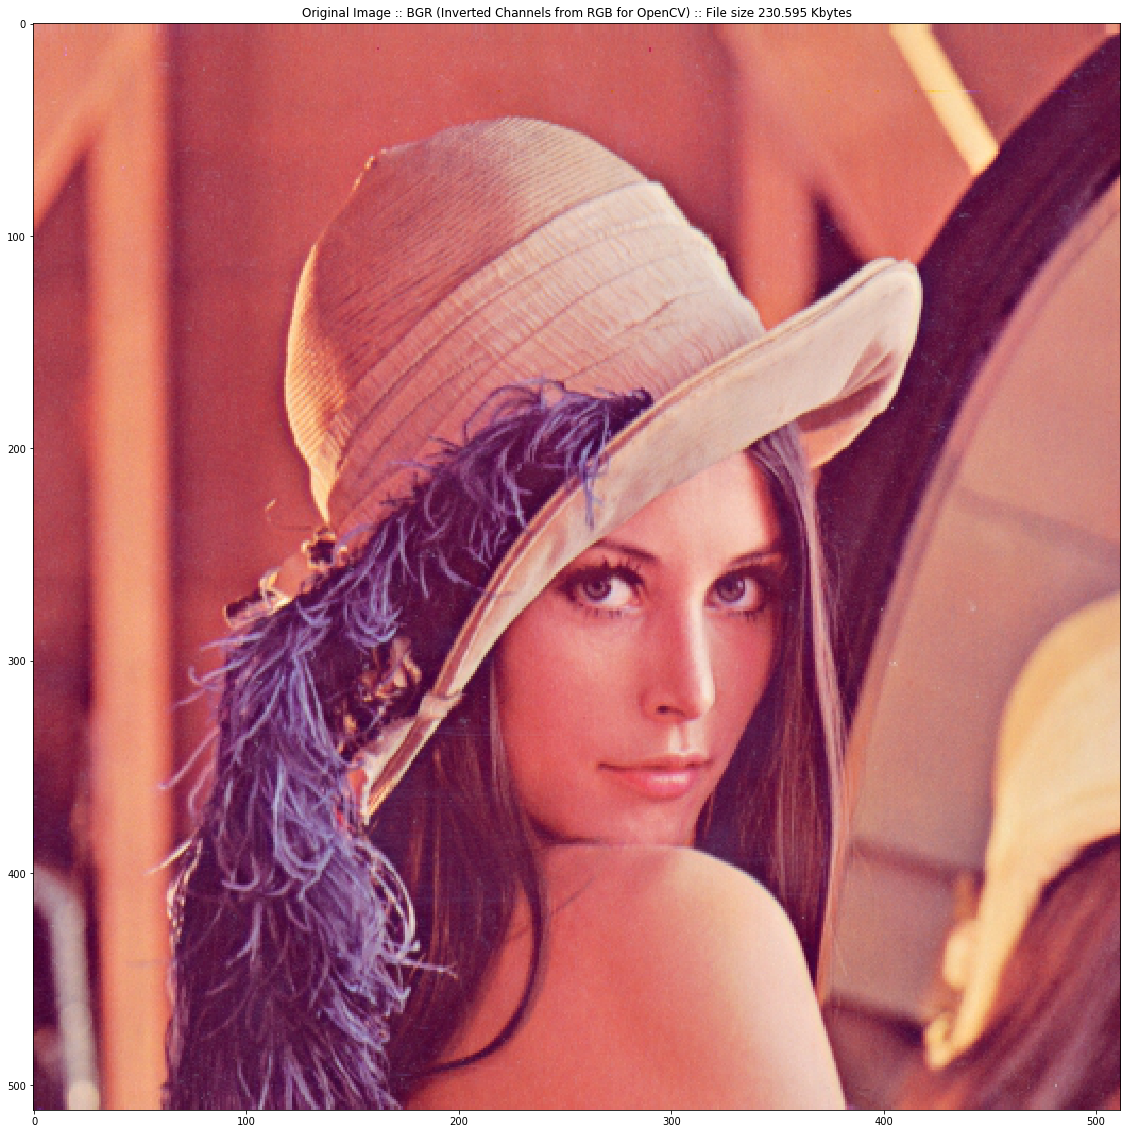

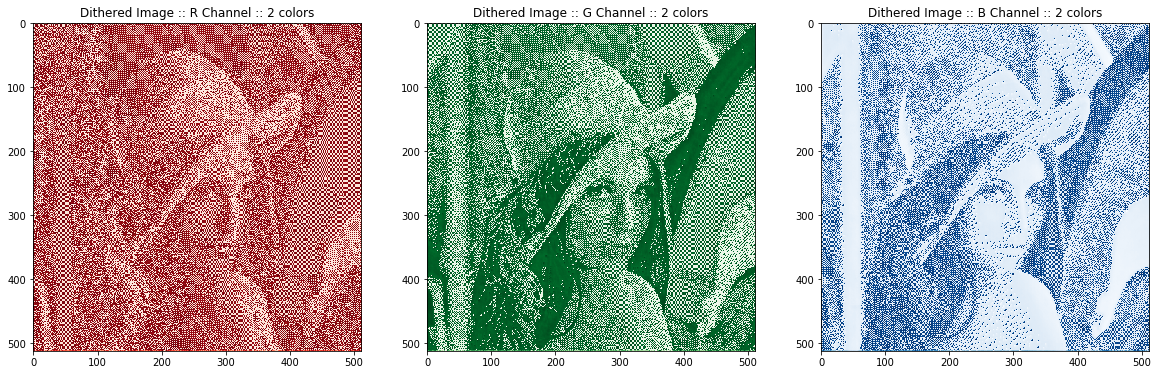

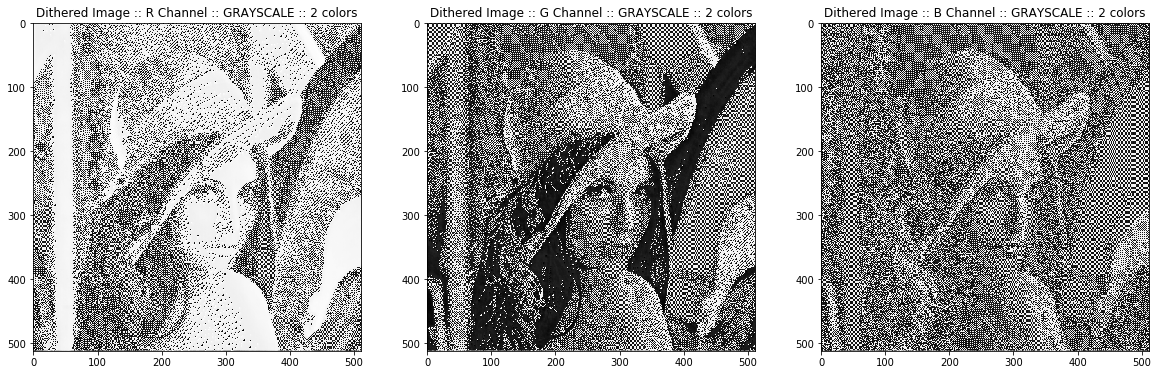

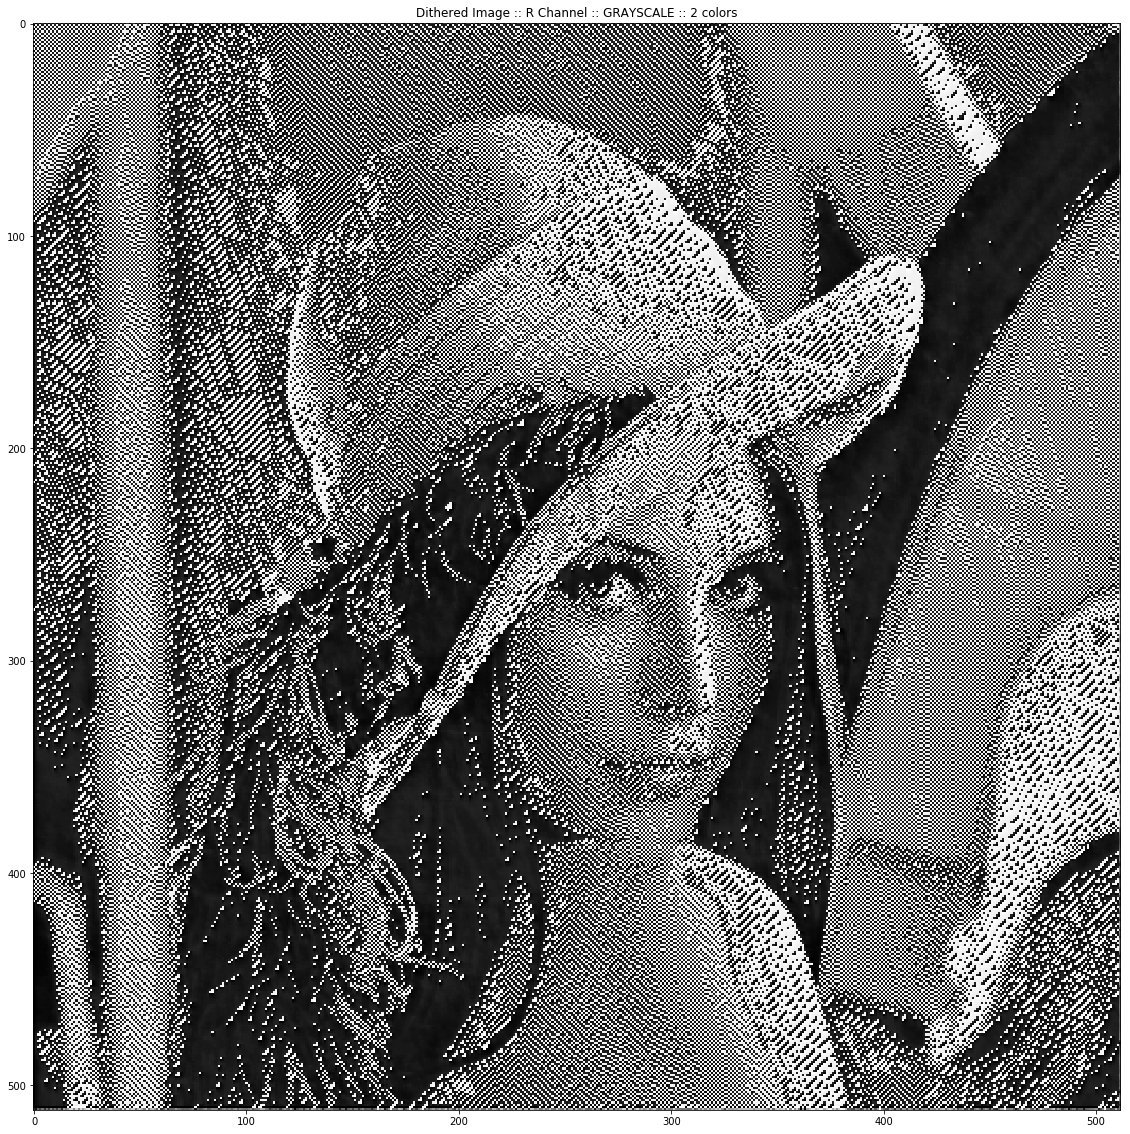

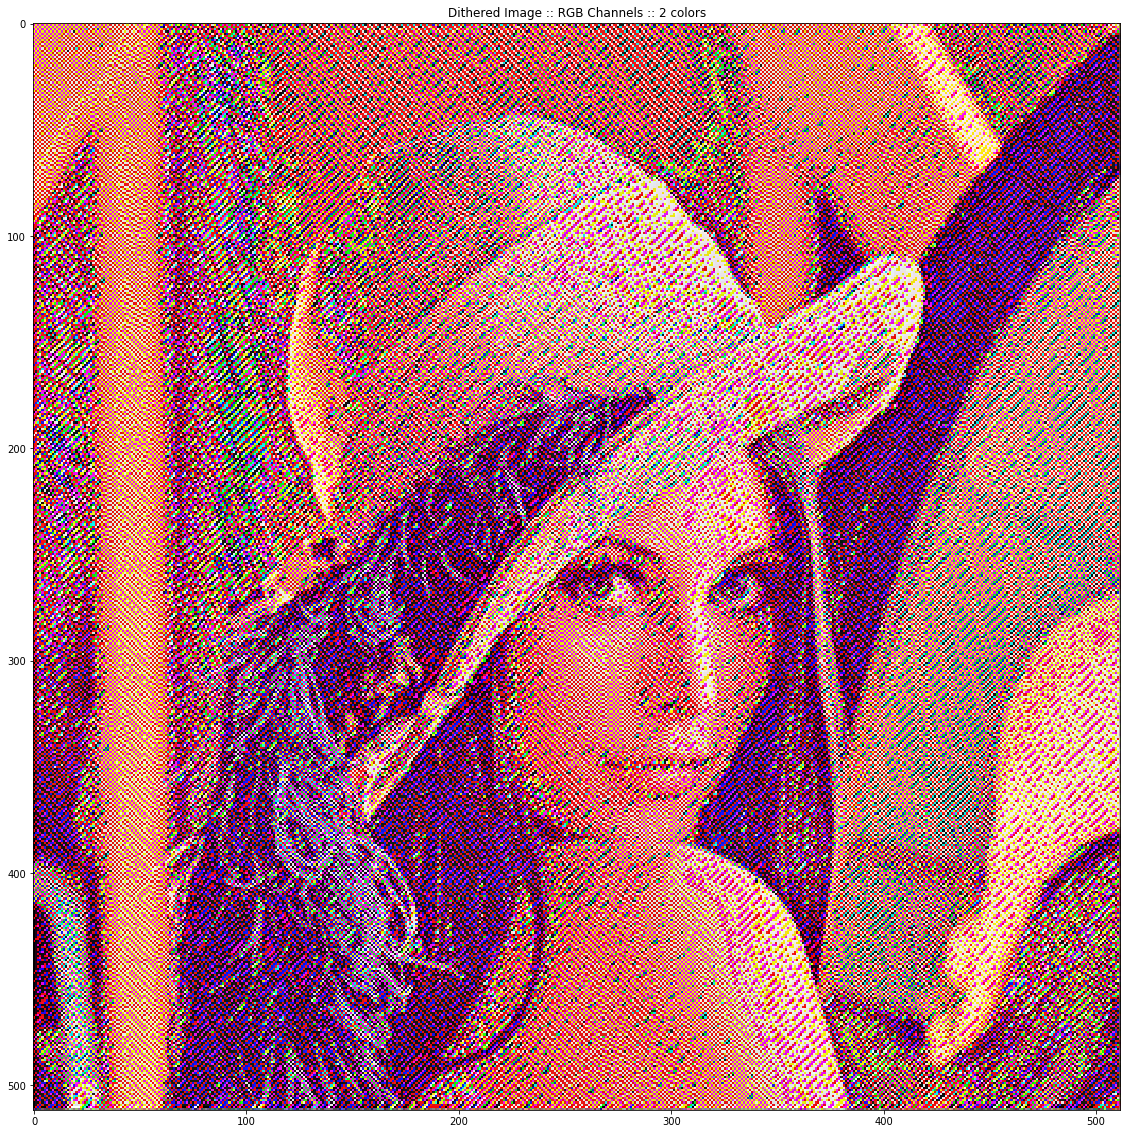

In [23]:
plt.figure(figsize=(20,20))
plt.title("Original Image :: BGR (Inverted Channels from RGB for OpenCV) :: File size " + str(oldsize/1000) + " Kbytes")
plt.imshow(completeimage[:,:,[2,1,0]]) #Inverting from BGR Channels
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(231)
plt.title("Dithered Image :: R Channel :: " + str(factor + 1) + " colors")
plt.imshow(ditheredimage[:,:,2], cmap='Reds_r')
plt.subplot(232)
plt.title("Dithered Image :: G Channel :: " + str(factor + 1) + " colors")
plt.imshow(ditheredimage[:,:,1],  cmap='Greens_r')
plt.subplot(233)
plt.title("Dithered Image :: B Channel :: " + str(factor + 1) + " colors")
plt.imshow(ditheredimage[:,:,0], cmap='Blues_r')
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(231)
plt.title("Dithered Image :: R Channel :: GRAYSCALE :: " + str(factor + 1) + " colors")
plt.imshow(ditheredimage[:,:,0], cmap='Greys_r')
plt.subplot(232)
plt.title("Dithered Image :: G Channel :: GRAYSCALE :: " + str(factor + 1) + " colors")
plt.imshow(ditheredimage[:,:,1], cmap='Greys_r')
plt.subplot(233)
plt.title("Dithered Image :: B Channel :: GRAYSCALE :: " + str(factor + 1) + " colors")
plt.imshow(ditheredimage[:,:,2], cmap='Greys_r')
plt.show()

plt.figure(figsize=(20,20))
plt.title("Dithered Image :: R Channel :: GRAYSCALE :: " + str(factor + 1) + " colors")
plt.imshow(ditheredimage[:,:,1], cmap='Greys_r')
plt.show()

plt.figure(figsize=(20,20))
plt.title("Dithered Image :: RGB Channels :: " + str(factor + 1) + " colors")
plt.imshow(ditheredimage[:,:,:])
plt.show()


<hr>
<h5>9. Construa uma função para gravar a matriz para um ﬁcheiro binário. Veriﬁque o tamanho do ﬁcheiro inicial e do ﬁcheiro ﬁnal. Calcule a taxa de compressão e meça o SNR e o PSNR.</h5>
<hr>


In [17]:
def writebinary(array):
    
    filename = "lenadither.txt"
    array.tofile(filename)
    filesize = os.path.getsize(filename)
    return filesize

ditheredsize = writebinary(ditheredimage[:,:,1])
print(str(ditheredsize/1000) + " Kbytes")

262.144 Kbytes
